In [1]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

In [2]:
spark = SparkSession.builder.getOrCreate()

In [3]:
msnpc = spark.read.csv("Visualization/MsNPC.csv", header=True,inferSchema=True)
msplayer = spark.read.csv("Visualization/MsPlayer.csv", header=True,inferSchema=True)
msweapon = spark.read.csv("Visualization/MsWeapon.csv", header=True,inferSchema=True)
msweapontype = spark.read.csv("Visualization/MsWeaponType.csv", header=True,inferSchema=True)
transactiondetail = spark.read.csv("Visualization/TransactionDetail.csv", header=True,inferSchema=True)
transactionheader = spark.read.csv("Visualization/TransactionHeader.csv", header=True,inferSchema=True)

msnpc.registerTempTable("MsNPC")
msplayer.registerTempTable("MsPlayer")
msweapon.registerTempTable("MsWeapon")
msweapontype.registerTempTable("MsWeaponType")
transactiondetail.registerTempTable("TransactionDetail")
transactionheader.registerTempTable("TransactionHeader")

In [7]:
res1 = spark.sql("select WeaponTypeName, SUM((Quantity * WeaponPrice)/100)as WeaponQty from MsWeaponType mwt join MsWeapon mw on mwt.WeaponTypeid = mw.WeaponTypeid join TransactionDetail td on mw.Weaponid = td.Weaponid join TransactionHeader th on td.Transactionid = th.Transactionid WHERE YEAR(TransactionDate) = 2019  GROUP BY WeaponTypeName  ORDER BY WeaponQty asc")
res1 = res1.toPandas()

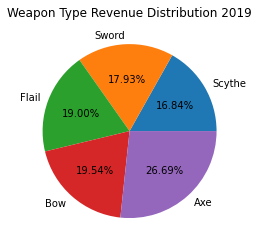

In [9]:
plt.title("Weapon Type Revenue Distribution 2019")
plt.pie(res1["WeaponQty"], labels=res1["WeaponTypeName"], autopct = "%.2f%%")
plt.show()

In [13]:
res2 = spark.sql("SELECT COUNT(DISTINCT mp.PlayerId) AS PlayerQty,MONTH(TransactionDate) as Bulan FROM MsPlayer mp JOIN TransactionHeader th on mp.Playerid = th.Playerid JOIN TransactionDetail td on th.Transactionid = td.Transactionid JOIN MsWeapon mw on td.Weaponid = mw.Weaponid JOIN MsWeaponType mwt on mw.WeaponTypeid = mwt.WeaponTypeid WHERE YEAR(TransactionDate) = 2019 AND WeaponTypeName LIKE 'Axe' GROUP BY MONTH(TransactionDate) ORDER BY MONTH(TransactionDate) asc")
res2 = res2.toPandas()             

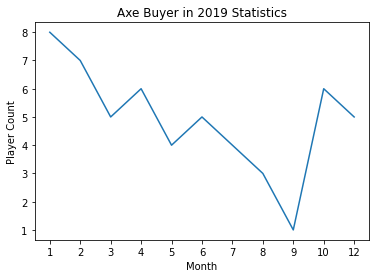

In [15]:
plt.plot(res2["PlayerQty"])
plt.xticks(range(len(res2["Bulan"])),res2["Bulan"])
plt.title("Axe Buyer in 2019 Statistics")
plt.xlabel("Month")
plt.ylabel("Player Count")
plt.show()

In [16]:
res3 = spark.sql("SELECT x.SpecialWeapon, COUNT(x.SpecialWeapon) as Freq FROM(SELECT mp.PlayerId,CASE WHEN SUM(WeaponPrice*Quantity) >2000000 THEN 'Extinction' WHEN SUM(WeaponPrice*Quantity) >=1500000 and SUM(WeaponPrice*Quantity) <=1999999 then 'Nightfall' WHEN SUM(Weaponprice*Quantity)>=1000000 THEN 'Stormbreaker' END AS SpecialWeapon FROM MsPlayer mp right join TransactionHeader th on mp.PlayerId = th.PlayerId right join TransactionDetail td on th.TransactionId = td.TransactionId right join MsWeapon mw on td.WeaponID = mw.WeaponID right join MsWeaponType mwt on mw.WeaponTypeId = mwt.WeaponTypeId WHERE PlayerGender LIKE 'Female' AND YEAR(TransactionDate) = 2019 GROUP BY mp.PlayerId,MONTH(TransactionDate)ORDER BY SUM(WeaponPrice*Quantity)DESC)AS x GROUP BY x.SpecialWeapon ORDER BY Freq DESC")
res3 = res3.toPandas()

In [18]:
res3

,SpecialWeapon,Freq
0,Stormbreaker,17
1,Nightfall,9
2,Extinction,7
3,None,0


In [19]:
res3 = res3.drop(3)

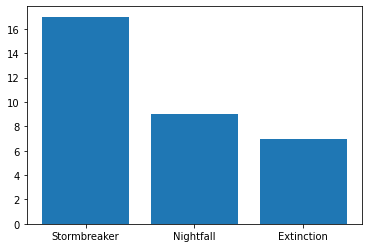

In [20]:
plt.bar(res3["SpecialWeapon"],res3["Freq"])
plt.show()